In [46]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
sns.set(font_scale=1.4)
sns.set_style("whitegrid")

In [2]:
conn = sqlite3.connect('microdados_enem2017/database.db')

In [3]:
df1 = pd.read_sql('SELECT nu_nota_mt,tp_cor_raca,q006,sg_uf_residencia FROM enem WHERE tp_cor_raca=1 or tp_cor_raca=4', conn).apply(pd.to_numeric)

In [4]:
df1

,NU_NOTA_MT,TP_COR_RACA,Q006,SG_UF_RESIDENCIA
0,465.5,1,3,23
1,591.2,1,3,22
2,578.5,1,9,19
3,645.1,1,4,5
4,425.5,1,1,23
5,430.8,1,0,11
6,481.7,1,2,2
7,769.1,1,8,23
8,790.4,1,3,19
9,500.6,1,3,15


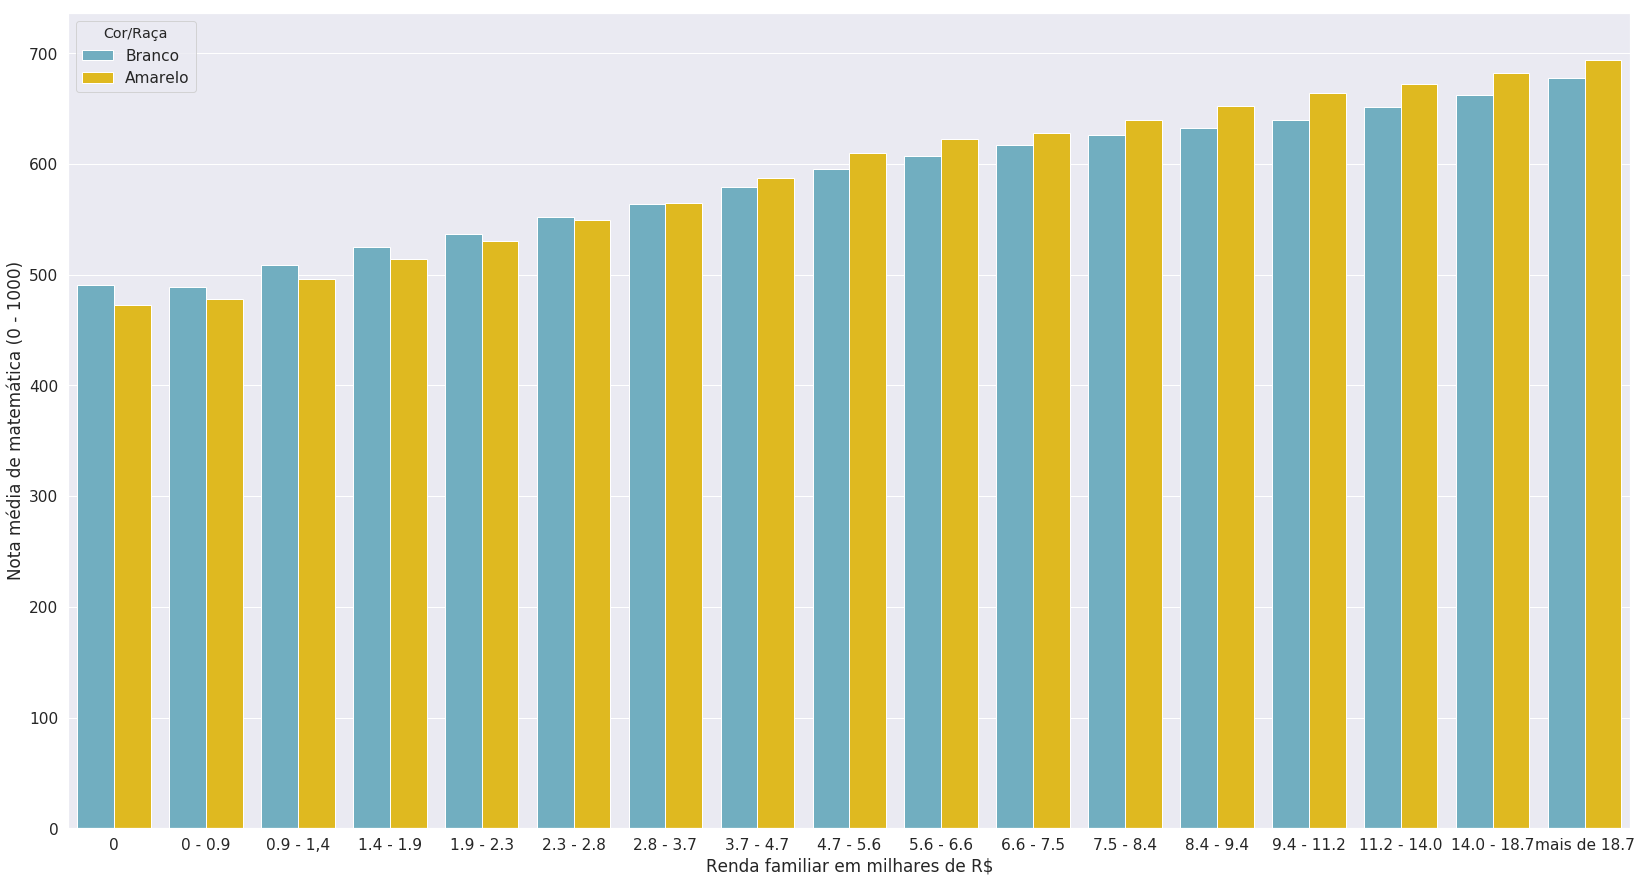

In [5]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=df1, hue_order=[1,4], errwidth=0,
                palette=['c', '#ffcc00'], ax=ax)

g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Amarelo')):
    t.set_text(l)

In [6]:
brancos = df1[df1['TP_COR_RACA'] == 1]
amarelos = df1[df1['TP_COR_RACA'] == 4]

In [7]:
len(brancos),len(amarelos)

(1619098, 102304)

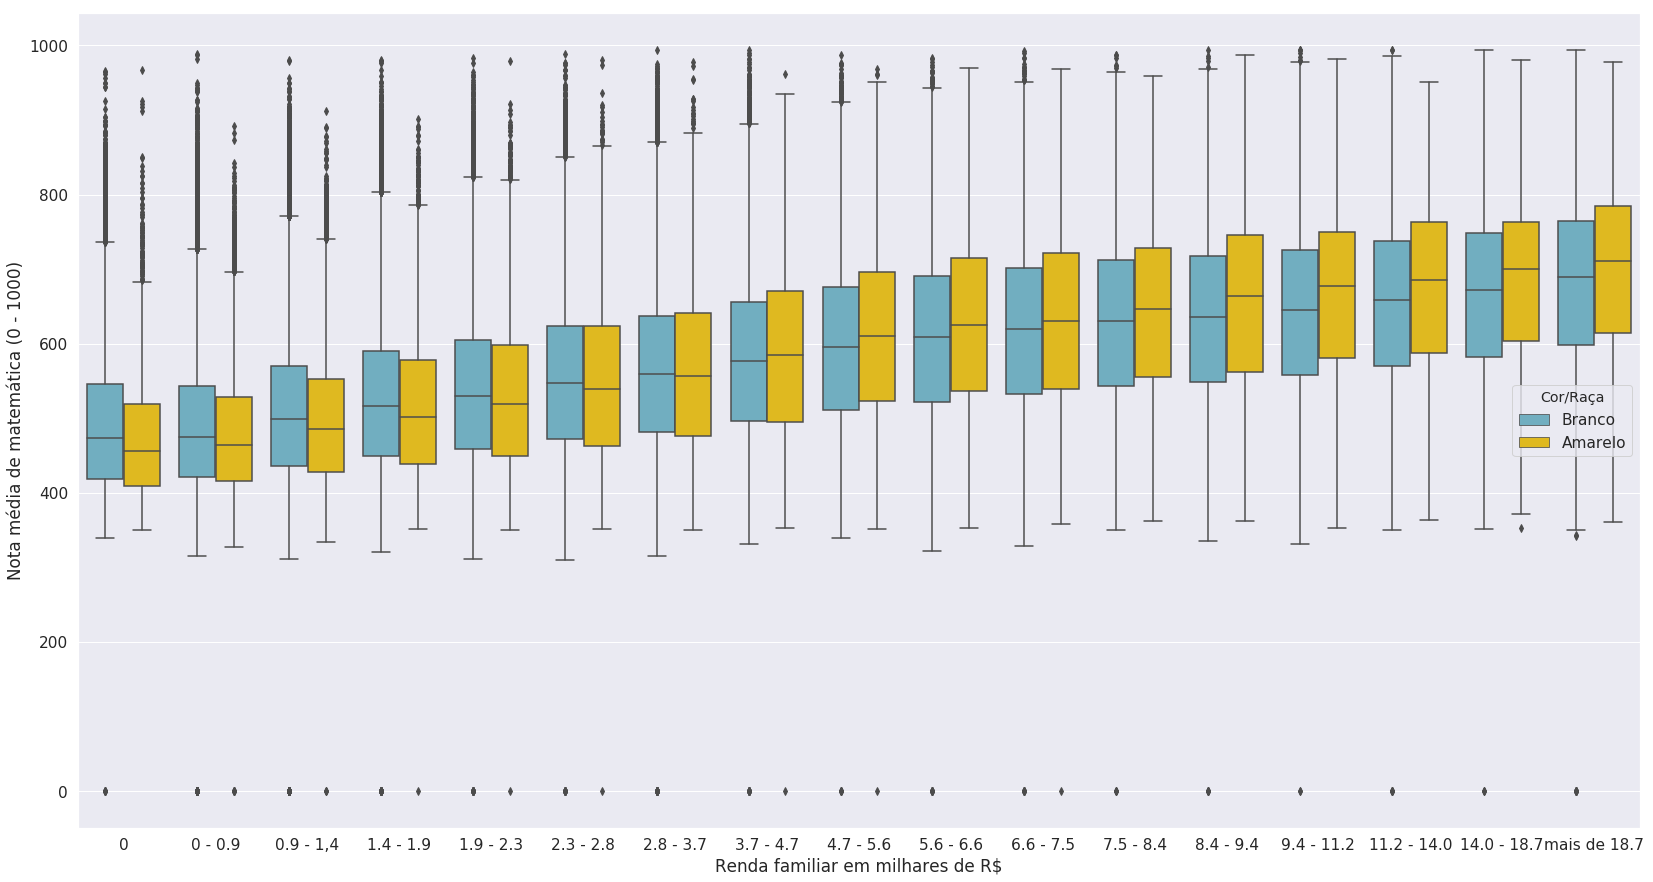

In [8]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.boxplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=df1, hue_order=[1,4],
                palette=['c', '#ffcc00'], ax=ax)

g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Amarelo')):
    t.set_text(l)

In [9]:
ufs = [
'AC',
'AL',
'AP',
'AM',
'BA',
'CE',
'ES',
'GO',
'MA',
'MT',
'MS',
'MG',
'PA',
'PB',
'PR',
'PE',
'PI',
'RJ',
'RN',
'RS',
'RO',
'RR',
'SC',
'SP',
'SE',
'TO',
'DF'
]

In [10]:
ufs.index('BA')

4

In [11]:
df2 = pd.read_sql('''SELECT nu_nota_mt,tp_cor_raca,q006,sg_uf_residencia FROM enem 
                     WHERE tp_cor_raca=1 or tp_cor_raca=2''', 
                  conn).apply(pd.to_numeric)

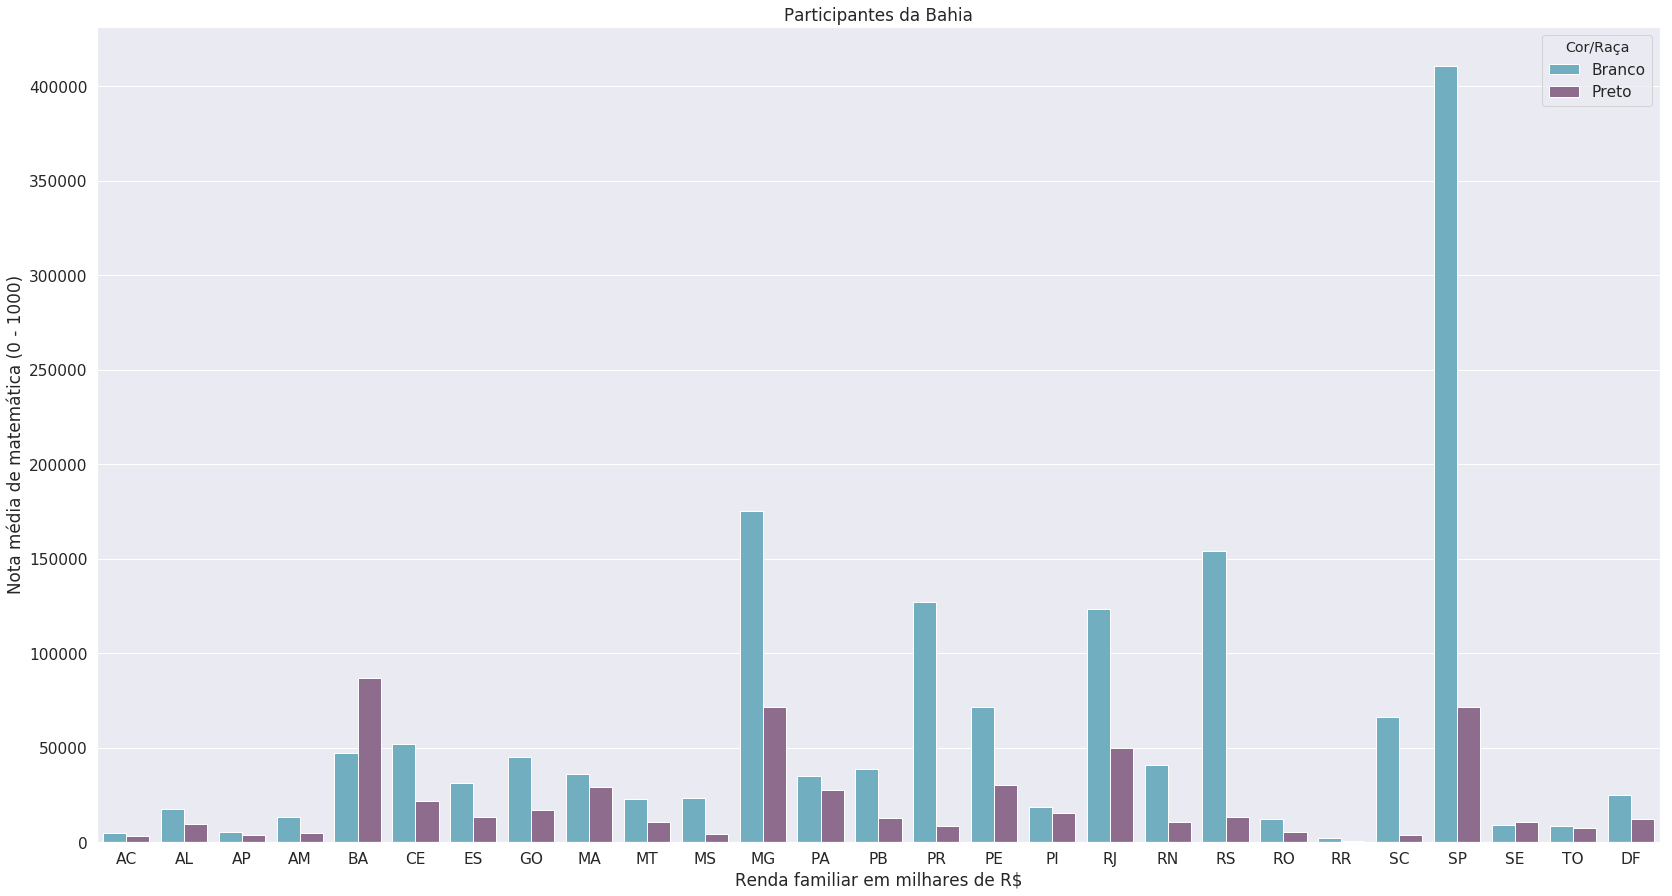

In [12]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.countplot(x='SG_UF_RESIDENCIA', hue='TP_COR_RACA', data=df2, hue_order=[1,2],
                palette=['c', '#946694'], ax=ax)

g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
      title ="Participantes da Bahia",
      xticklabels = ufs)

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Preto')):
    t.set_text(l)

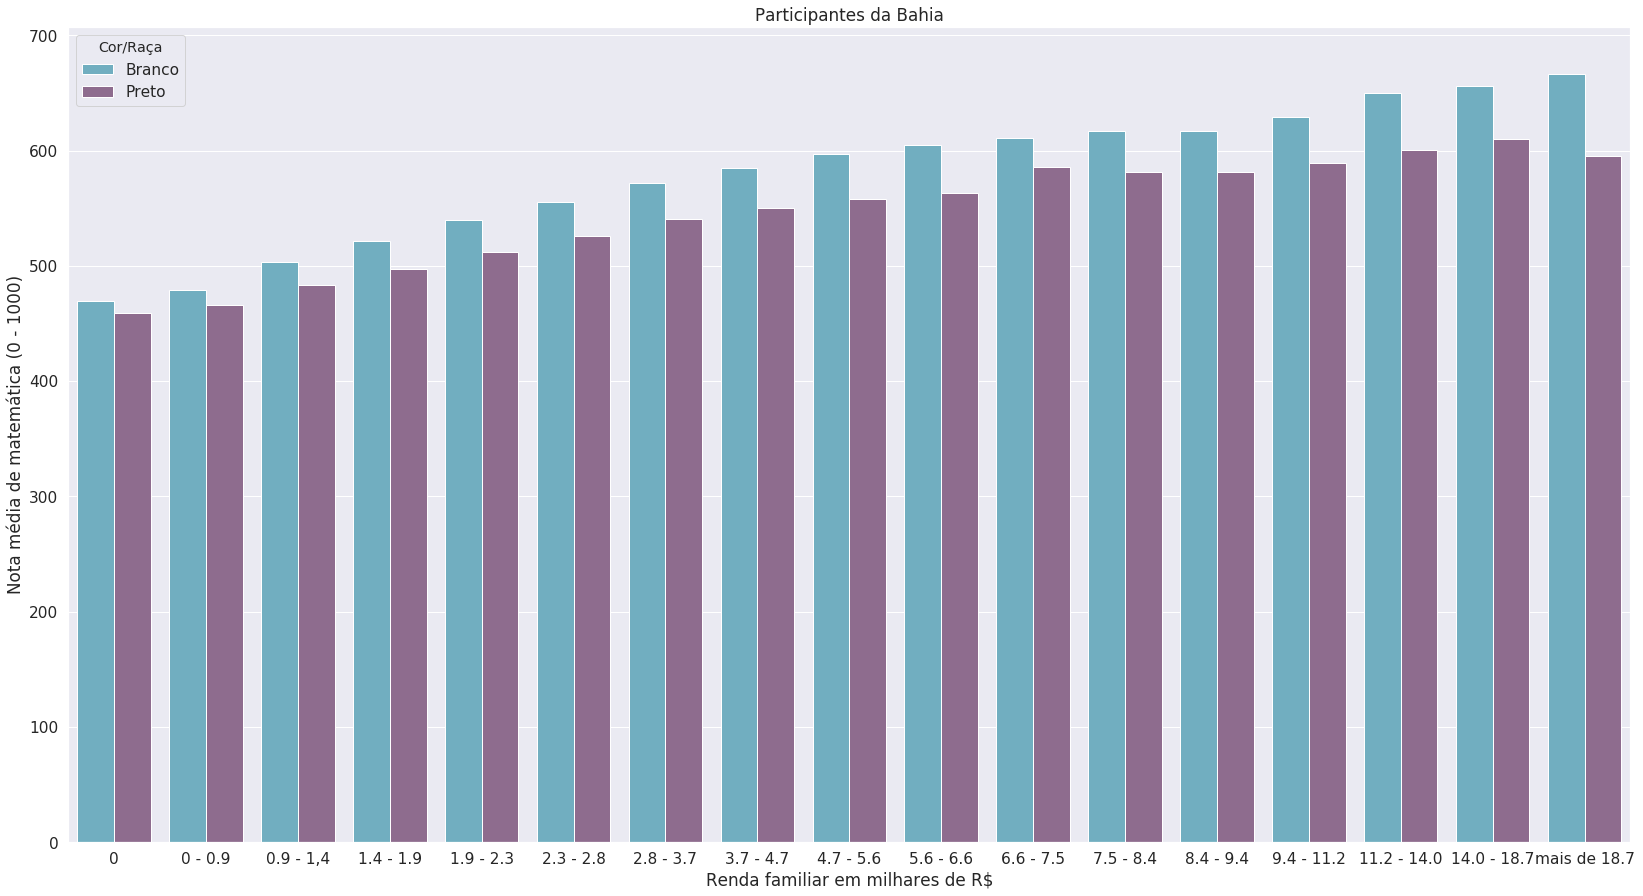

In [13]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.barplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=df2[df2['SG_UF_RESIDENCIA'] == 4], 
                hue_order=[1,2], errwidth=0,
                palette=['c', '#946694'], ax=ax)

g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
      title ="Participantes da Bahia",
      xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Preto')):
    t.set_text(l)

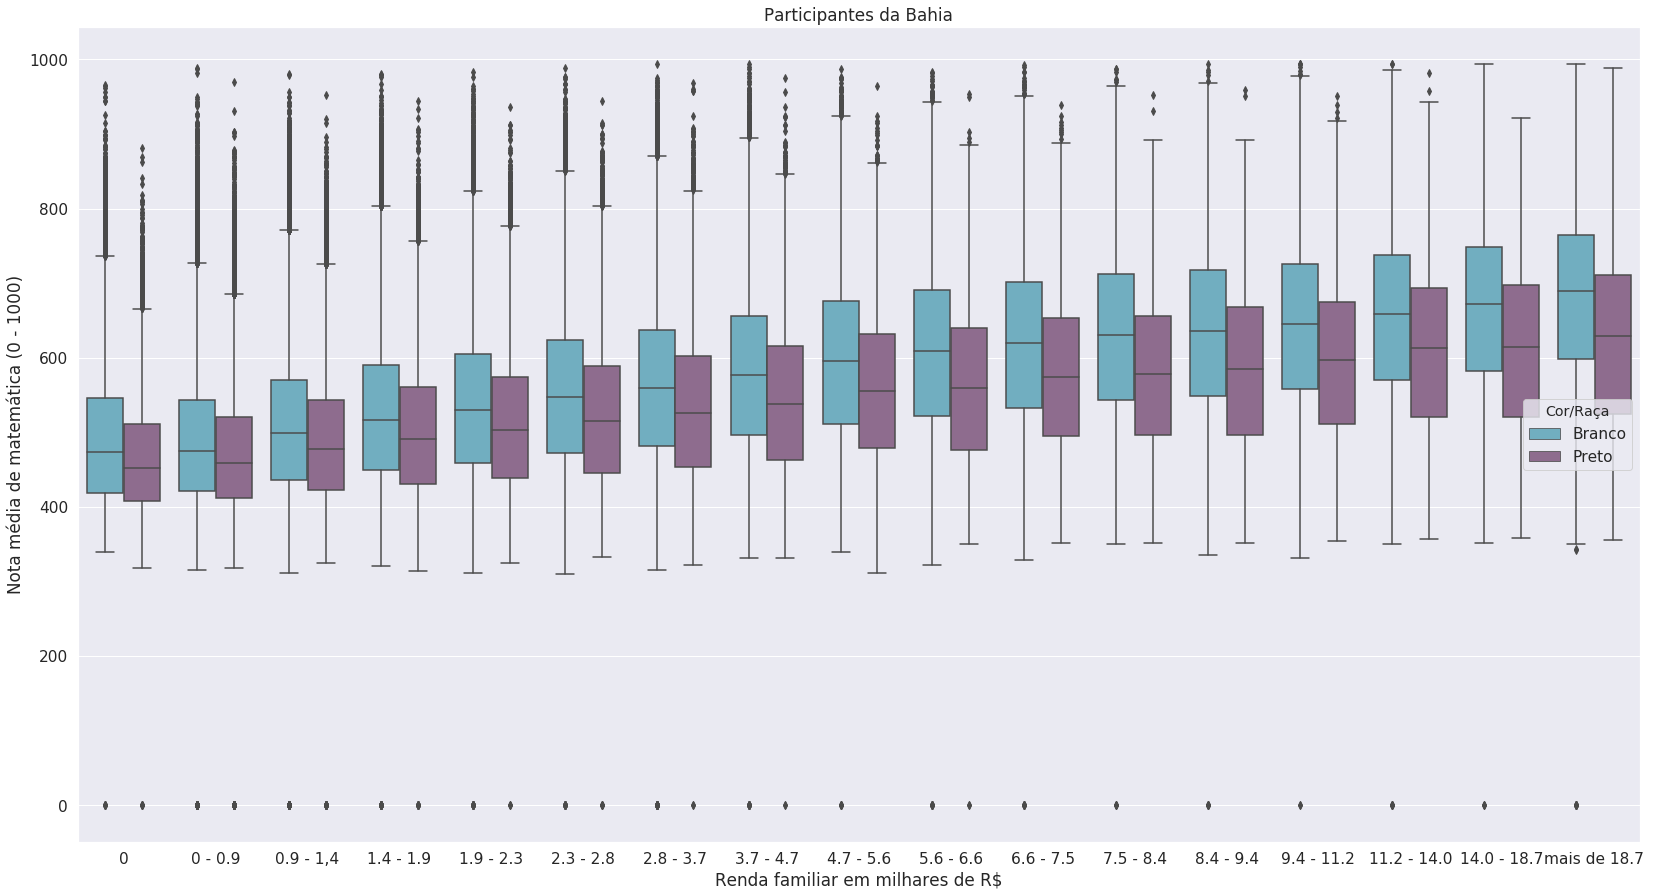

In [14]:
fig, ax = plt.subplots(figsize=(28,15))
g = sns.boxplot(x='Q006', y='NU_NOTA_MT', hue='TP_COR_RACA', data=df2, hue_order=[1,2],
                palette=['c', '#946694'], ax=ax)
g.set(xlabel ="Renda familiar em milhares de R$", ylabel ="Nota média de matemática (0 - 1000)",
      title ="Participantes da Bahia",
      xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])

legend = g.get_legend()

legend.set_title('Cor/Raça')
for t, l in zip(legend.texts,('Branco', 'Preto')):
    t.set_text(l)

In [68]:
df3 = pd.read_sql('SELECT nu_nota_redacao,tp_sexo,q006 FROM enem WHERE tp_sexo=0 OR tp_sexo=1 and q006 != -1', conn).apply(pd.to_numeric)

ValueError: color kwarg must have one color per dataset

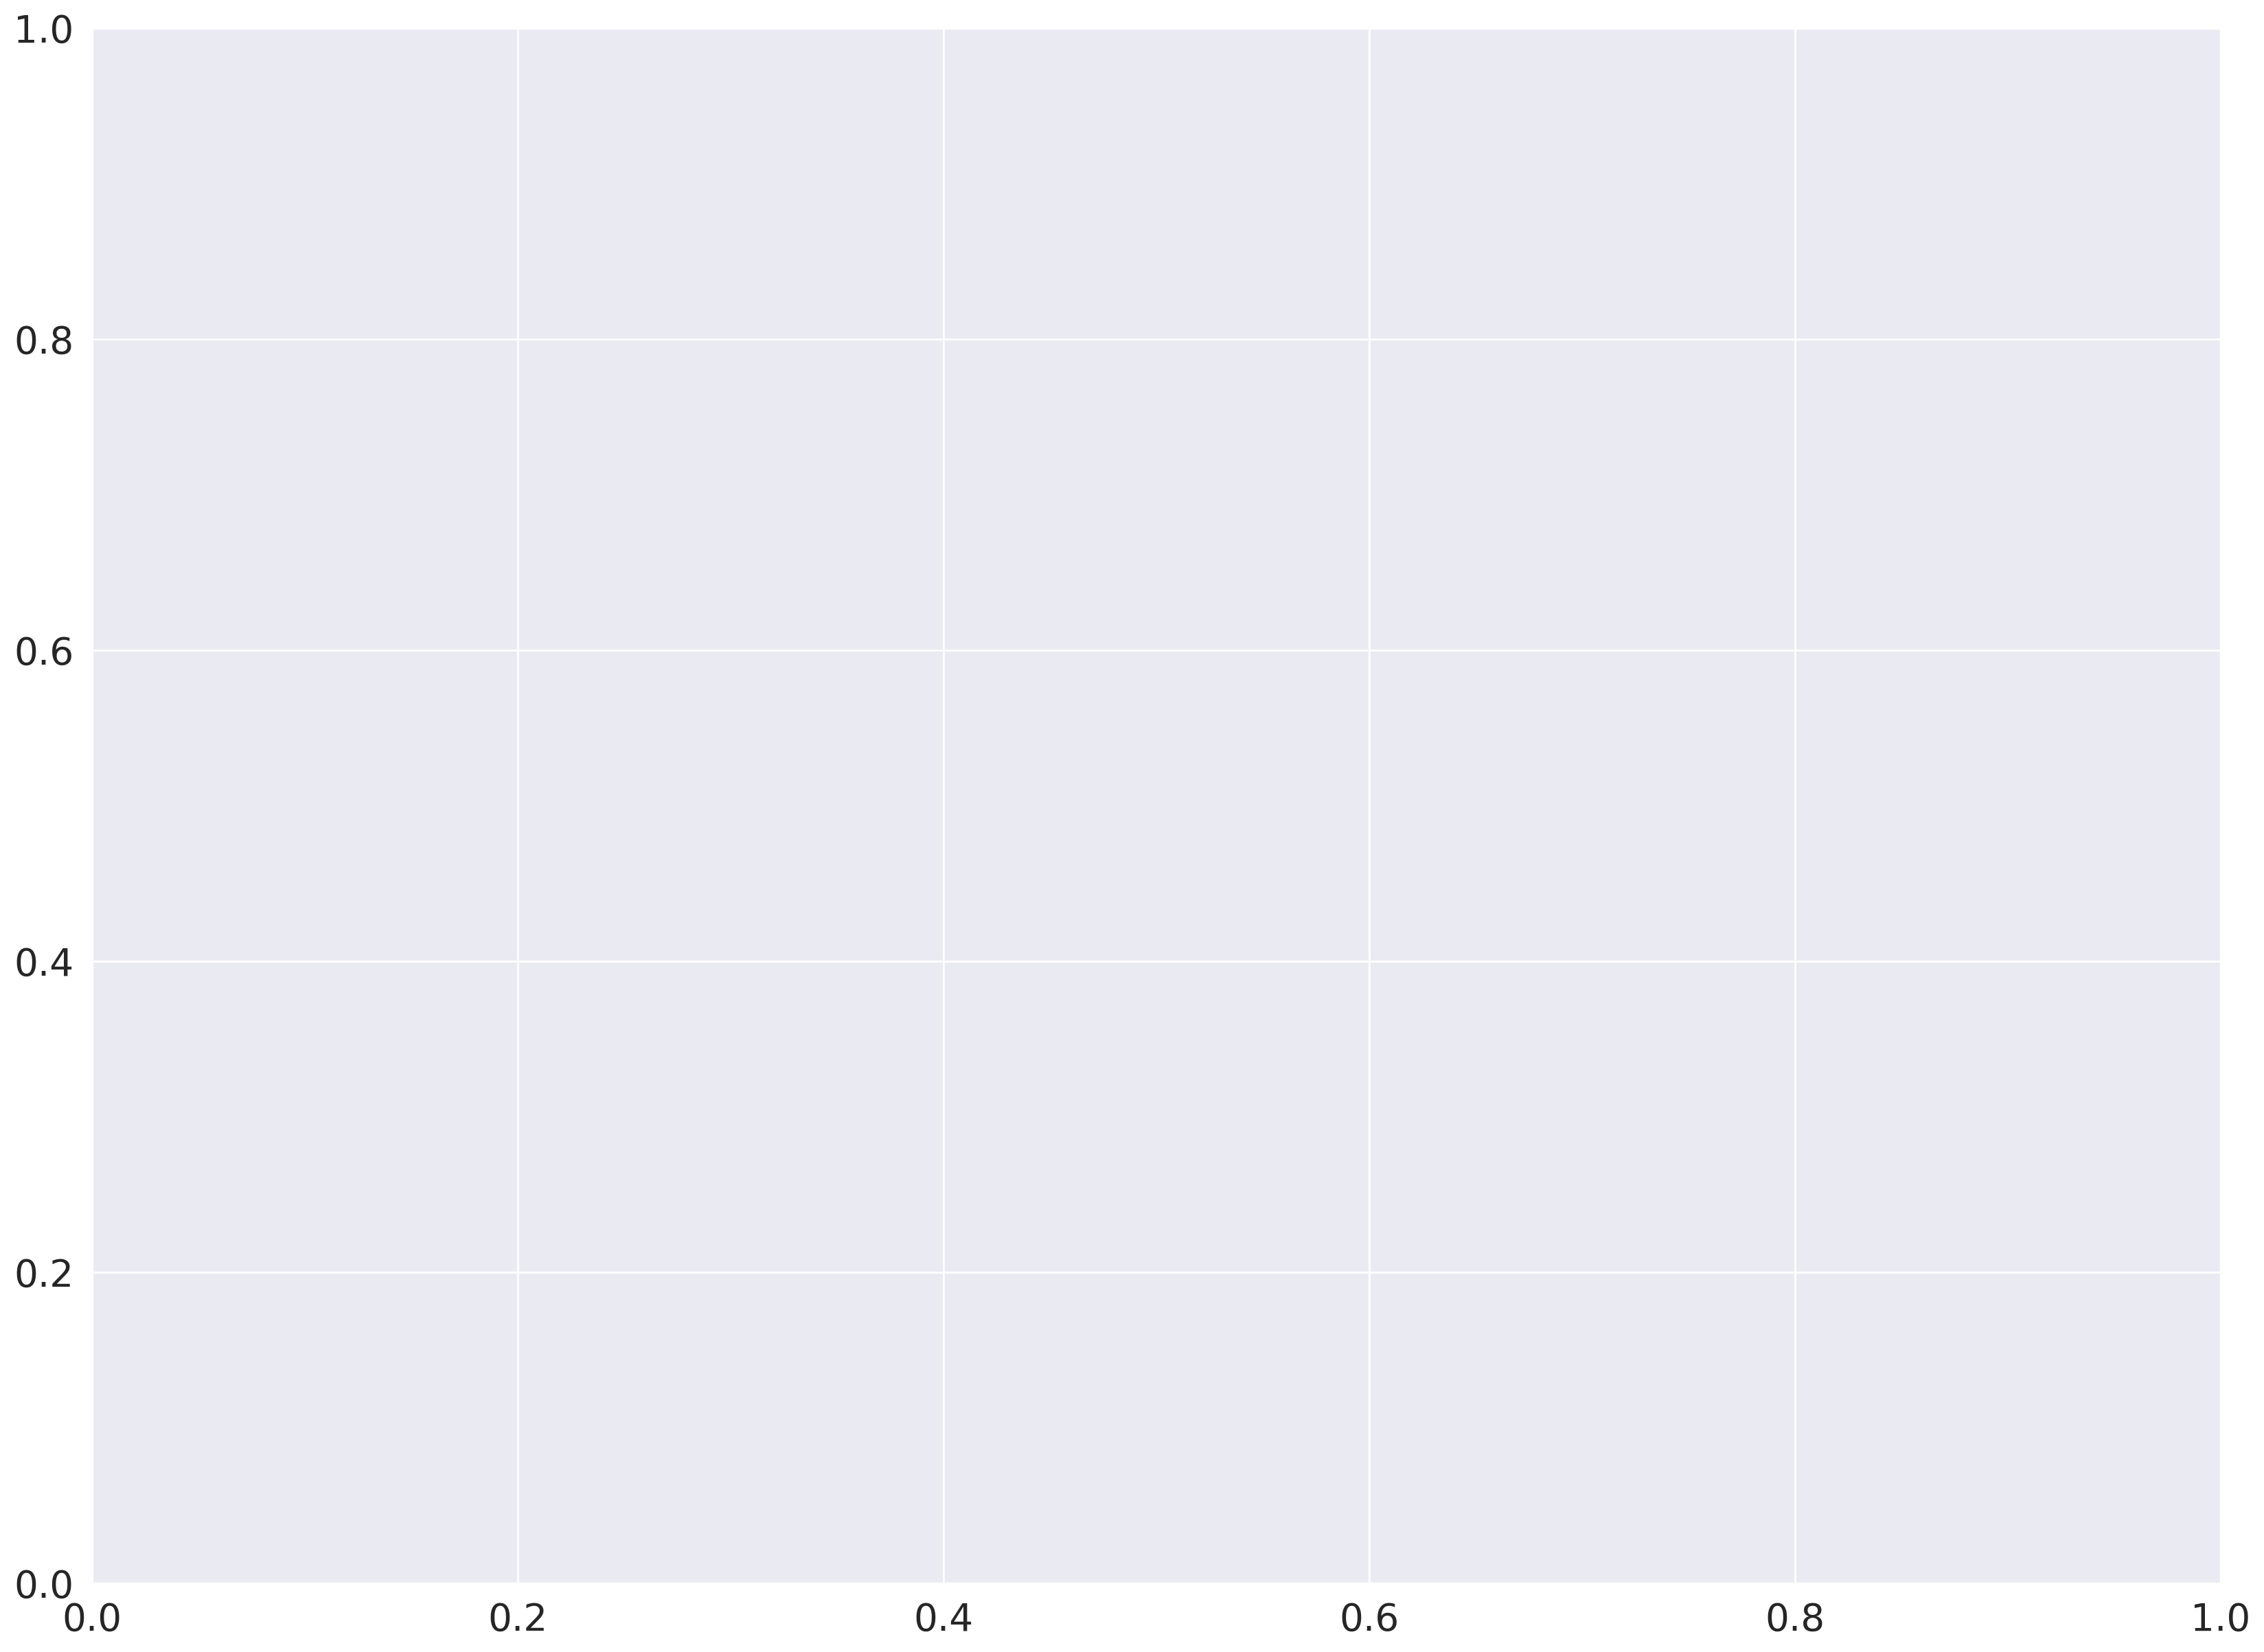

In [92]:
sns.set(font_scale=1.8)
fig, ax = plt.subplots(figsize=(20,15))
sns.distplot(df3[df3['TP_SEXO'] == 0], hist=True, kde=False, bins=20, norm_hist=True, ax=ax, label='Masculino', color=['b', 'r'])
sns.distplot(df3[df3['TP_SEXO'] == 1], hist=True, kde=False, bins=20, norm_hist=True, ax=ax, label='Feminino', color=['b', 'r'])

ax.set(xlabel ="Nota em Redação (0-1000)", ylabel ="Frequência medida para cada sexo (%)")
ax.legend(title='Sexo')
sns.set(font_scale=1.4)

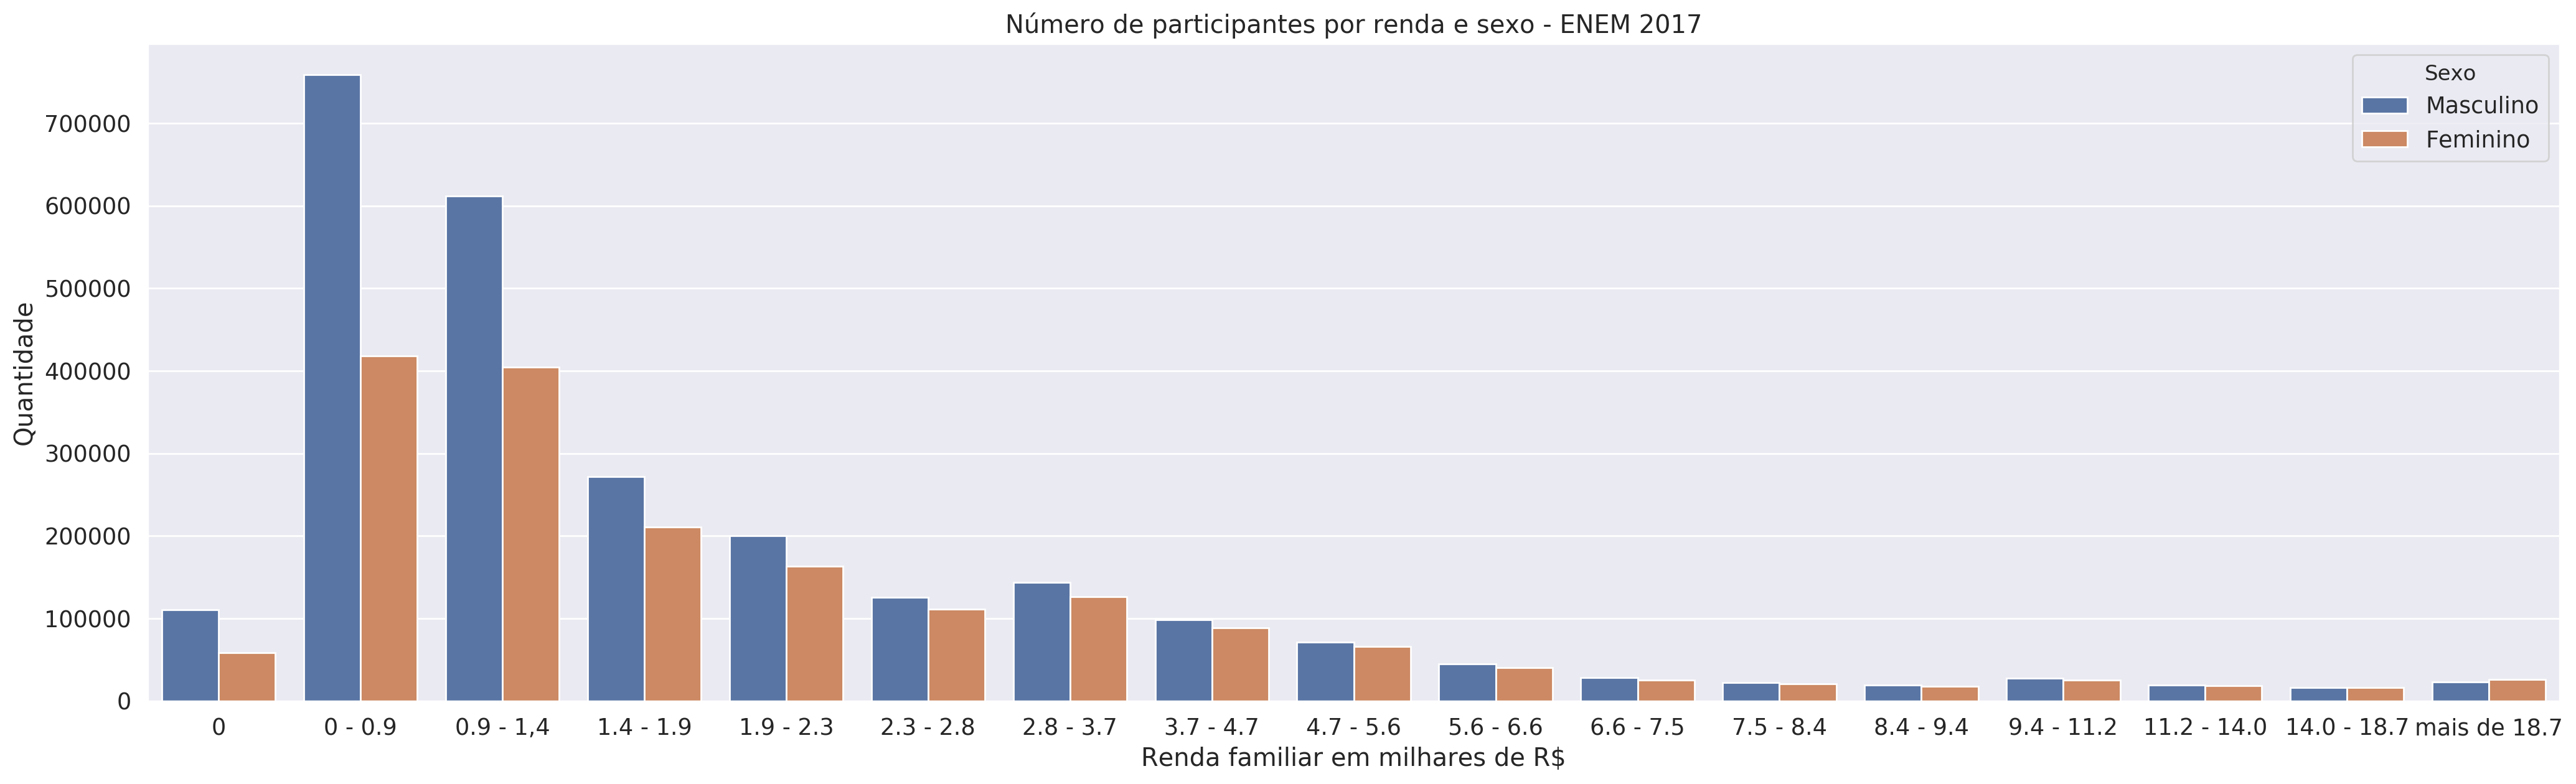

In [90]:
fig, ax = plt.subplots(figsize=(25,7))
sns.set(font_scale=1.2)
g = sns.countplot(x='Q006', data=df3, hue='TP_SEXO', ax=ax)

legend = g.get_legend()

legend.set_title('Sexo')
for t, l in zip(legend.texts,('Masculino', 'Feminino')):
    t.set_text(l)

ax.set(title='Número de participantes por renda e sexo - ENEM 2017',
       xlabel ="Renda familiar em milhares de R$", ylabel ="Quantidade",
       xticklabels =["0", 
                     "0 - 0.9", 
                     "0.9 - 1,4", 
                     "1.4 - 1.9", 
                     "1.9 - 2.3", 
                     "2.3 - 2.8", 
                     "2.8 - 3.7", 
                     "3.7 - 4.7", 
                     "4.7 - 5.6",
                     "5.6 - 6.6",
                     "6.6 - 7.5",
                     "7.5 - 8.4",
                     "8.4 - 9.4",
                     "9.4 - 11.2",
                     "11.2 - 14.0",
                     "14.0 - 18.7",
                     "mais de 18.7"])
ax

In [86]:
len(df3[df3['TP_SEXO'] == 0]),len(df3[df3['TP_SEXO'] == 1])

(2591024, 1835730)

In [88]:
(1835730)/(2591024+1835730)

0.41468986078738507